# Introdução

bbla bla bla

# Modelagem

In [1]:
import tensorflow as tf
tf.__version__

'1.12.0'

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import weasyprint
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

# Pro PDF gerado ter imagens vetorizadas
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

C:\Users\ignit\src\ufmg\2018_2_compnat\TP\TP3\local\lib\site-packages\weasyprint\fonts.py:217: UserWarning: @font-face not supported: FontConfig cannot load default config file
  '@font-face not supported: '
C:\Users\ignit\src\ufmg\2018_2_compnat\TP\TP3\local\lib\site-packages\weasyprint\fonts.py:441: UserWarning: Expect ugly output with font-size: 0
  warnings.warn('Expect ugly output with font-size: 0')
C:\Users\ignit\src\ufmg\2018_2_compnat\TP\TP3\local\lib\site-packages\weasyprint\document.py:34: UserWarning: There are known rendering problems and missing features with cairo < 1.15.4. WeasyPrint may work with older versions, but please read the note about the needed cairo version on the "Install" page of the documentation before reporting bugs. http://weasyprint.readthedocs.io/en/latest/install.html
  'There are known rendering problems and missing features with '


In [35]:
data = pd.read_csv('datasets/sdss.csv')
data.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0,5000.00000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000
mean,1.237650e+18,176.021524,14.495667,18.612439,17.361550,16.832257,16.573334,16.415803,979.331000,301.0,3.63620,303.242800,1.653333e+18,0.139531,1468.368400,52955.508800,354.991200
std,0.000000e+00,47.689490,25.049573,0.837760,0.949571,1.076939,1.134204,1.205510,272.359236,0.0,1.65795,162.399063,2.005152e+18,0.385866,1780.919896,1508.680378,207.383739
min,1.237650e+18,8.245963,-5.371988,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.00000,11.000000,2.995820e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,159.268913,-0.545643,18.177408,16.800165,16.169960,15.845267,15.604807,752.000000,301.0,2.00000,187.750000,3.379298e+17,0.000070,300.000000,51900.000000,190.000000
50%,1.237650e+18,181.010438,0.372192,18.838955,17.495135,16.858230,16.564555,16.397065,756.000000,301.0,4.00000,300.000000,4.966320e+17,0.040561,441.000000,51999.000000,352.500000
75%,1.237650e+18,201.217273,14.670635,19.253945,18.003083,17.503900,17.250765,17.131455,1331.000000,301.0,5.00000,412.000000,2.881340e+18,0.090527,2559.000000,54468.000000,511.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,24.361810,22.826910,1412.000000,301.0,6.00000,768.000000,9.319320e+18,5.353854,8277.000000,57401.000000,1000.000000


Verificamos que a coluna objid e rerun não tem variação, portanto será descartada.

In [24]:
df = data.drop(['objid', 'run', 'rerun', 'camcol', 'field', 'specobjid', 'plate', 'fiberid'], axis=1)
df.head()

,ra,dec,u,g,r,i,z,class,redshift,mjd
0,199.753207,-0.510695,19.45393,18.51145,18.18137,18.03087,18.02434,STAR,-0.000079,54970
1,208.885042,0.190004,15.65154,15.70653,15.97689,16.18581,16.42148,STAR,0.000006,55605
2,166.967111,0.226408,19.25672,18.03317,17.49975,17.28412,17.19632,STAR,0.000130,51900
3,27.075930,13.166724,19.47090,18.40165,18.11839,18.00243,18.04496,STAR,-0.000643,53262
4,113.223523,36.428723,19.44052,17.95550,17.14517,16.63720,16.34859,GALAXY,0.084617,51877


In [32]:
star_color='#FF0000'
galaxy_color='#008000'
qso_color='#0000FF'

array_color=[star_color, galaxy_color, qso_color]

GALAXY    2501
STAR      2087
QSO        412
Name: class, dtype: int64


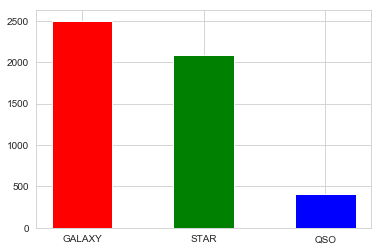

In [12]:
print(df['class'].value_counts())
values = df['class'].value_counts()
plt.bar(values.index, values.values, width=0.5, color=array_color);
# df['class'].value_counts().plot(kind='bar')
plt.savefig('SSDT Samples.pdf')
# plt.bar


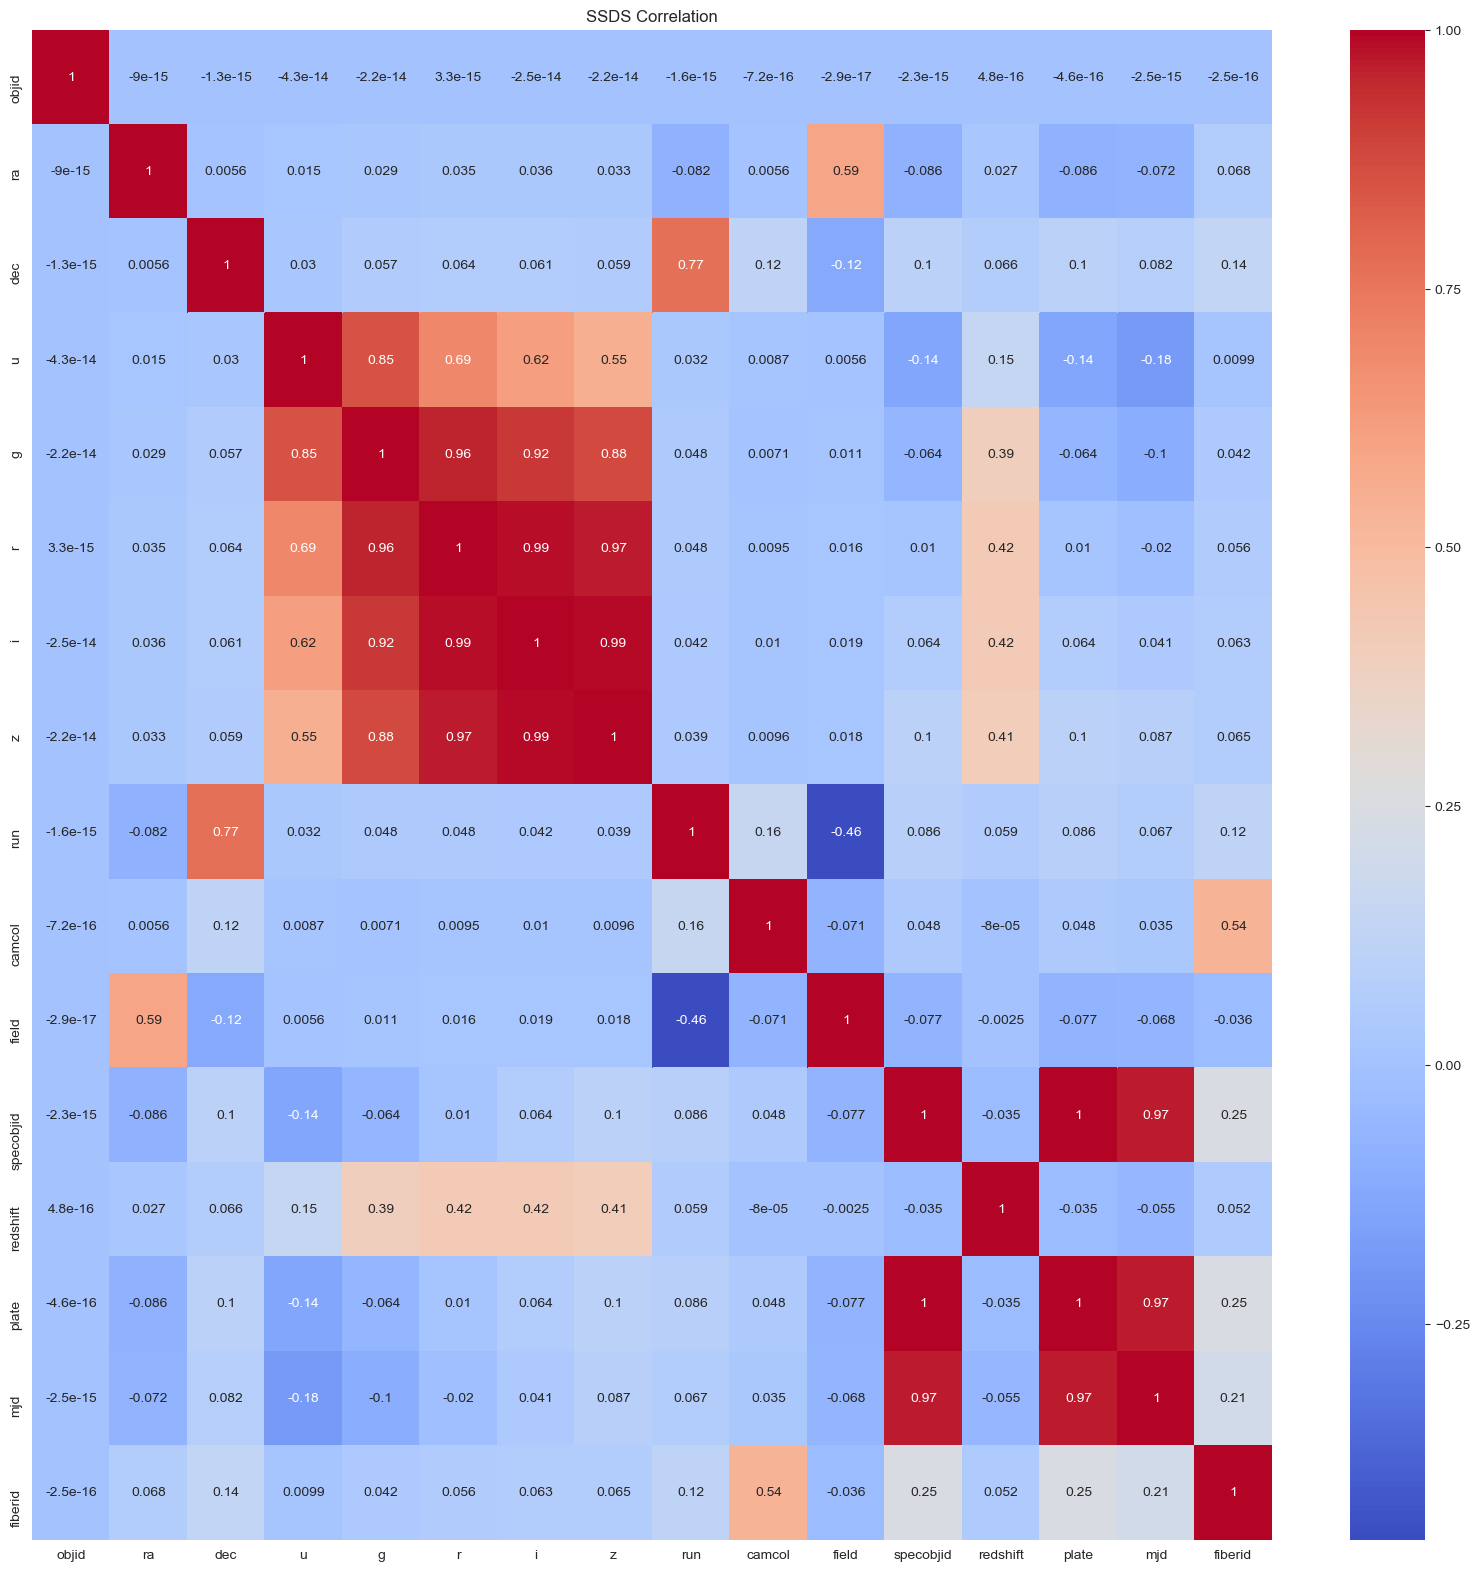

In [27]:
#...and with all the classes together
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(20, 20))
fig.set_dpi(100)

ax = sns.heatmap(data.drop('rerun', axis = 1).corr(), cmap='coolwarm', annot=True)
ax.set_title('SSDS Correlation');
plt.savefig('SSDS Correlation.pdf')

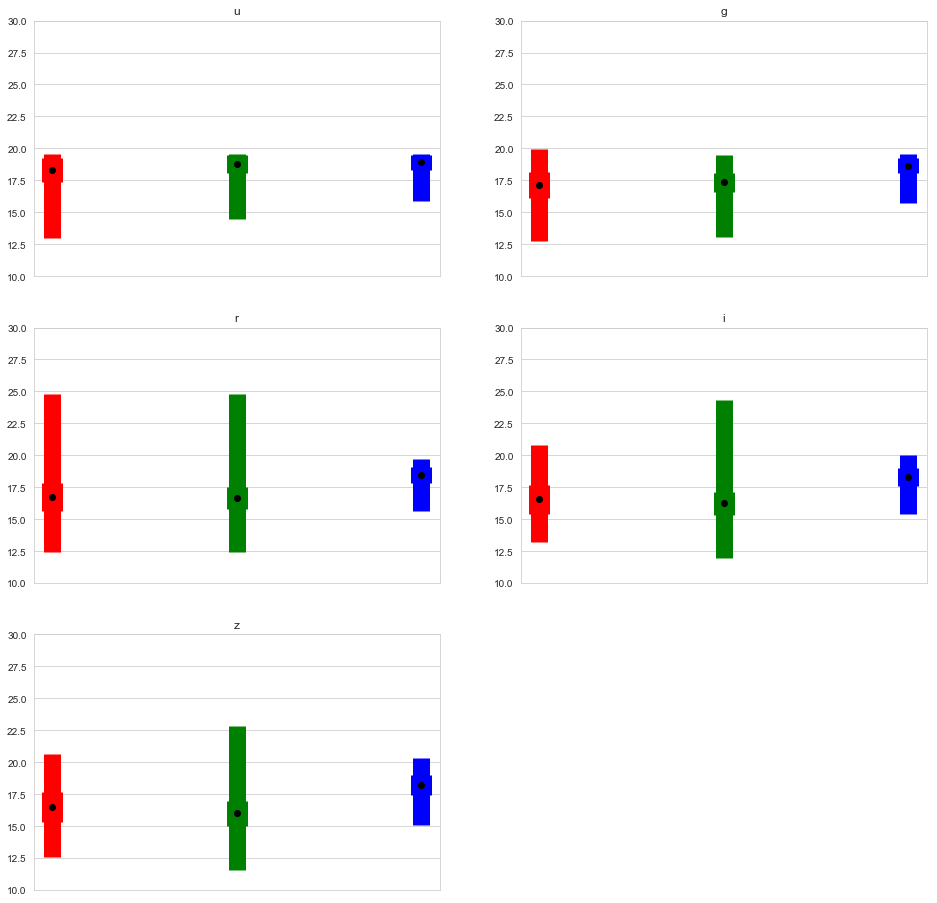

In [26]:
fig=plt.figure(1, figsize=(16,16))
ugriznames_array=['u','g','r','i','z']


for i in range(5):
    
    ax = fig.add_subplot(3, 2, i+1)
    ax.set_ylim(10,30)
    ax.xaxis.grid(False)
    # construct some data like what you have:
    u_errorbar= [df[df['class']=='STAR'][ugriznames_array[i]],
                 df[df['class']=='GALAXY'][ugriznames_array[i]],
                 df[df['class']=='QSO'][ugriznames_array[i]]]

    x=[0,1,2];

    mins = np.array([u_errorbar[0].min(0),u_errorbar[1].min(0),u_errorbar[2].min(0)])
    maxes = np.array([u_errorbar[0].max(0),u_errorbar[1].max(0),u_errorbar[2].max(0)])
    means = np.array([u_errorbar[0].mean(0),u_errorbar[1].mean(0),u_errorbar[2].mean(0)])
    std = np.array([u_errorbar[0].std(0),u_errorbar[1].std(0),u_errorbar[2].std(0)])

    # create stacked errorbars:
    plt.errorbar(np.arange(3), means, std, fmt='ok', linewidth=21, ecolor=array_color)
    plt.errorbar(np.arange(3), means, [means - mins, maxes - means],
                 fmt='.k', ecolor=array_color, lw=17)
    plt.tick_params( axis='x', which='both', bottom=False,top=False,labelbottom=False)

    plt.title(ugriznames_array[i])

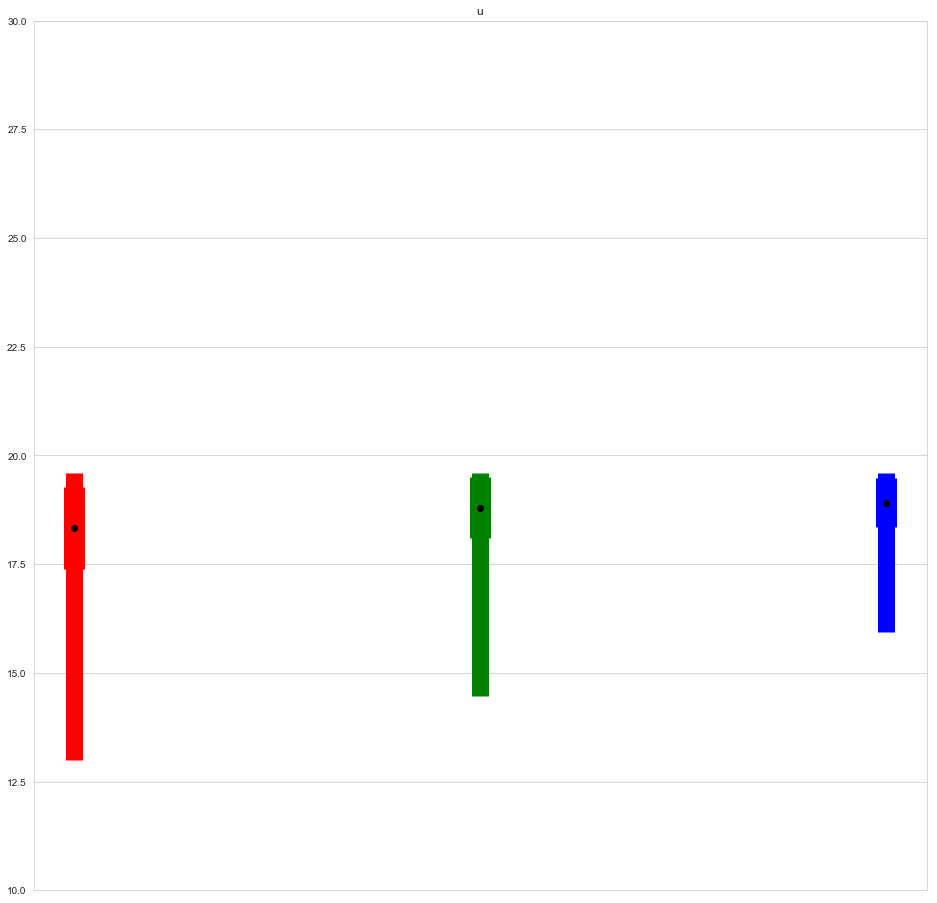

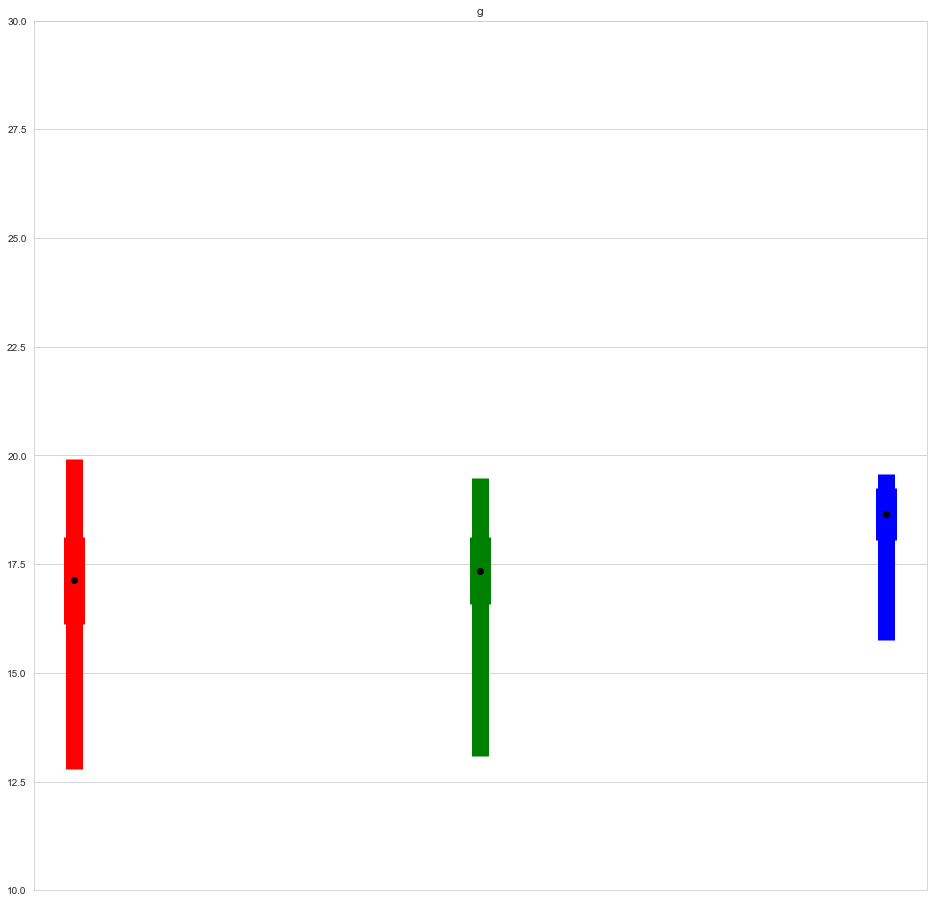

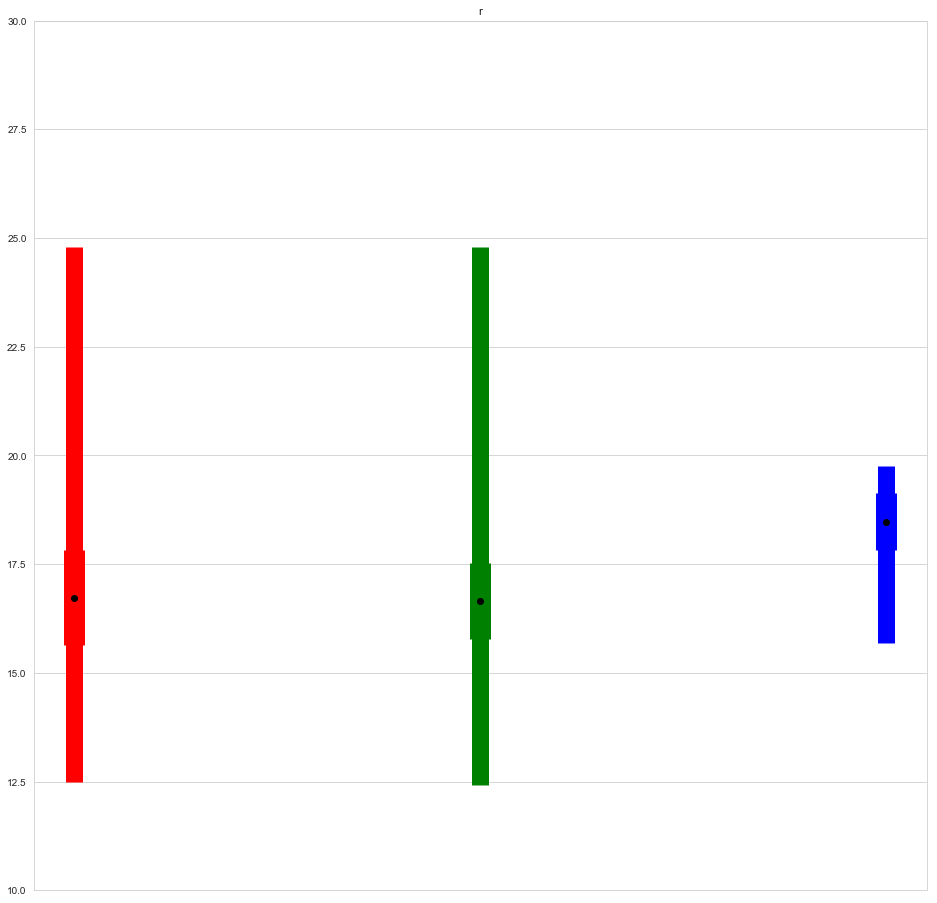

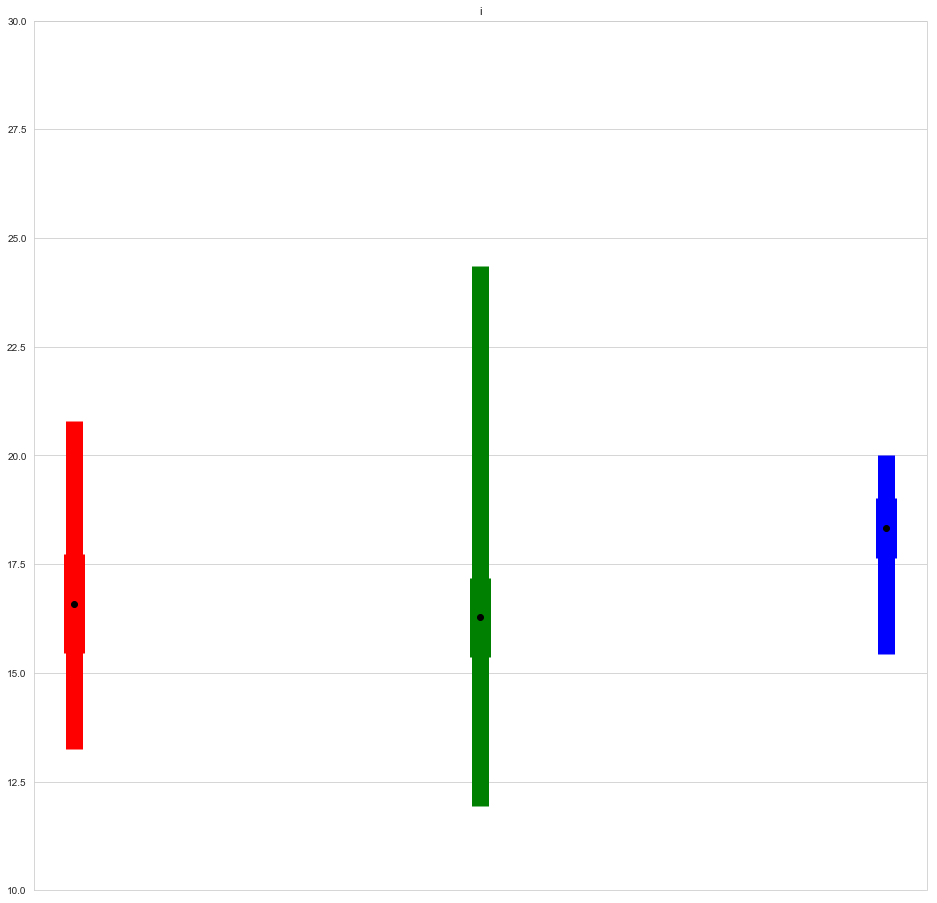

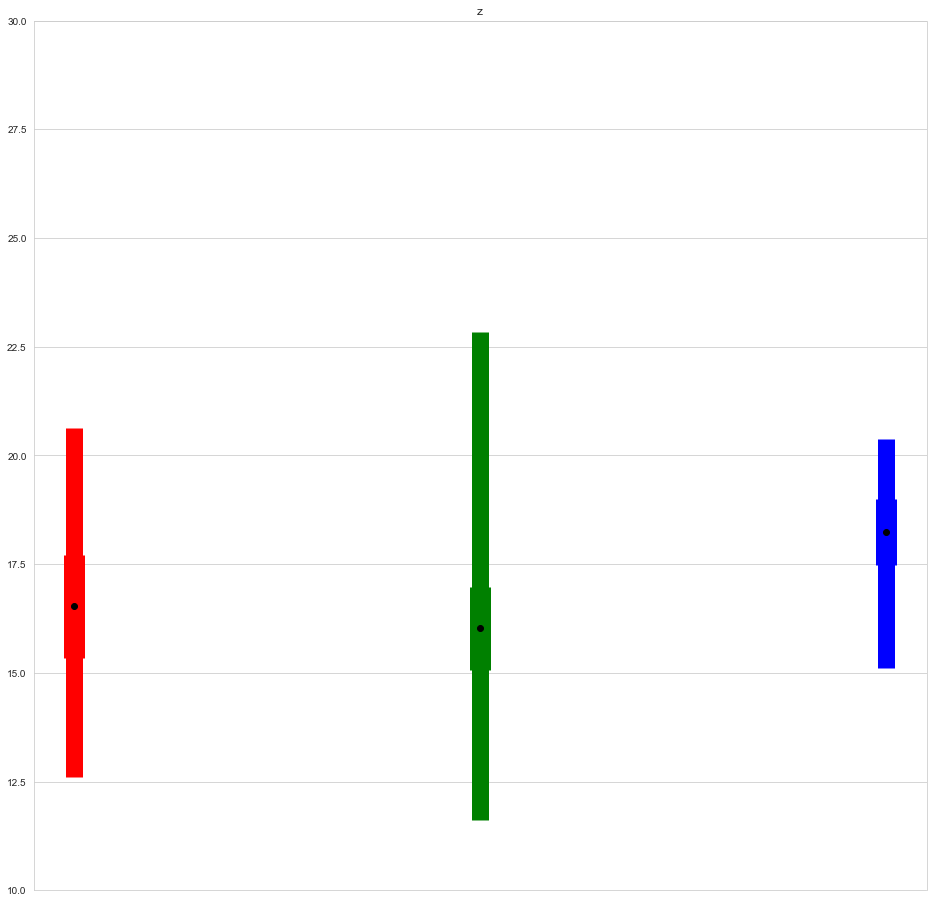

In [28]:
# fig=plt.figure(1,figsize=(16,16))

ugriznames_array=['u','g','r','i','z']

for i in range(5):
    fig = plt.figure(1, figsize=(16,16))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_ylim(10,30)
    ax.xaxis.grid(False)
    # construct some data like what you have:
    u_errorbar= [df[df['class']=='STAR'][ugriznames_array[i]],
                 df[df['class']=='GALAXY'][ugriznames_array[i]],
                 df[df['class']=='QSO'][ugriznames_array[i]]]

    x=[0,1,2];

    mins = np.array([u_errorbar[0].min(0),u_errorbar[1].min(0),u_errorbar[2].min(0)])
    maxes = np.array([u_errorbar[0].max(0),u_errorbar[1].max(0),u_errorbar[2].max(0)])
    means = np.array([u_errorbar[0].mean(0),u_errorbar[1].mean(0),u_errorbar[2].mean(0)])
    std = np.array([u_errorbar[0].std(0),u_errorbar[1].std(0),u_errorbar[2].std(0)])

    # create stacked errorbars:
    plt.errorbar(np.arange(3), means, std, fmt='ok', linewidth=21, ecolor=array_color)
    plt.errorbar(np.arange(3), means, [means - mins, maxes - means],
                 fmt='.k', ecolor=array_color, lw=17)
    plt.tick_params( axis='x', which='both', bottom=False,top=False,labelbottom=False)

    plt.title(ugriznames_array[i])
    plt.savefig('SDSS minmaxmean {}.pdf'.format(ugriznames_array[i]))
    plt.show()

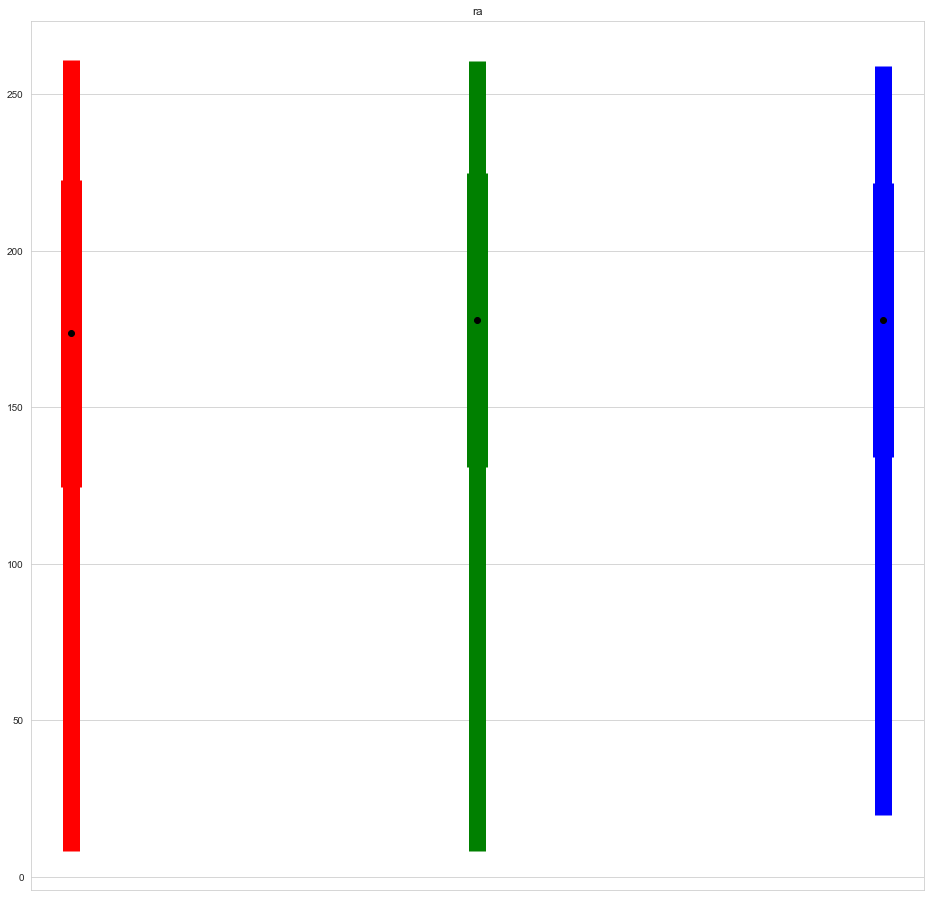

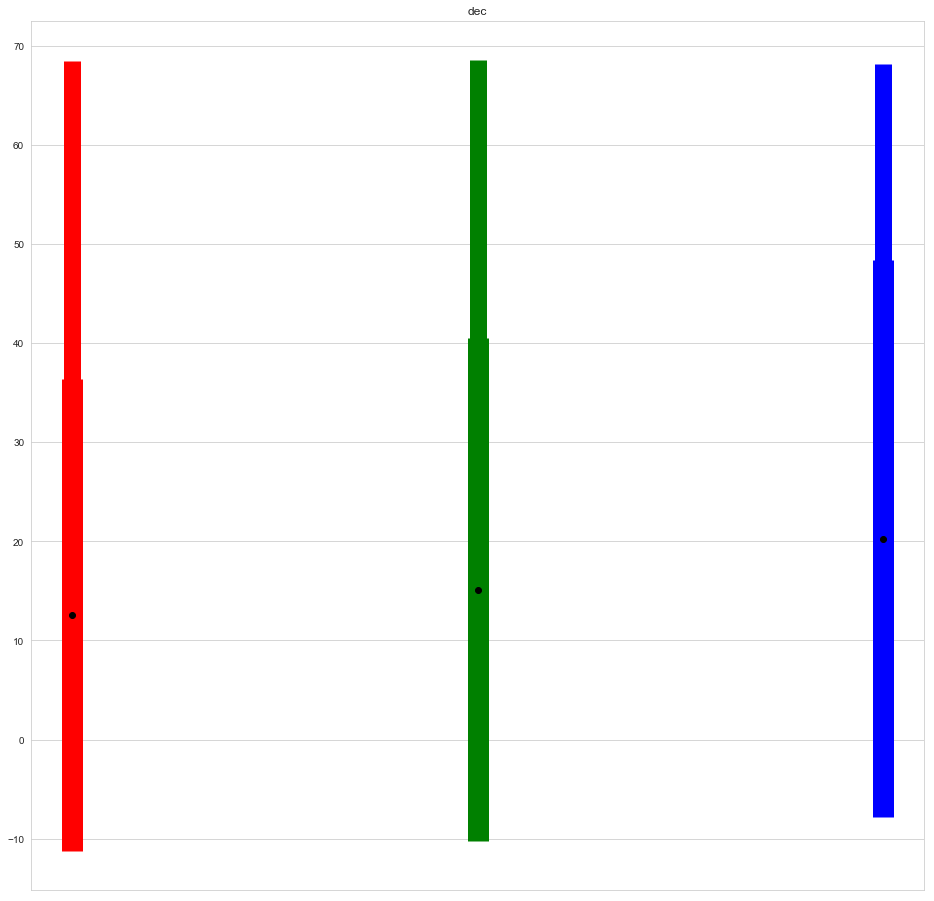

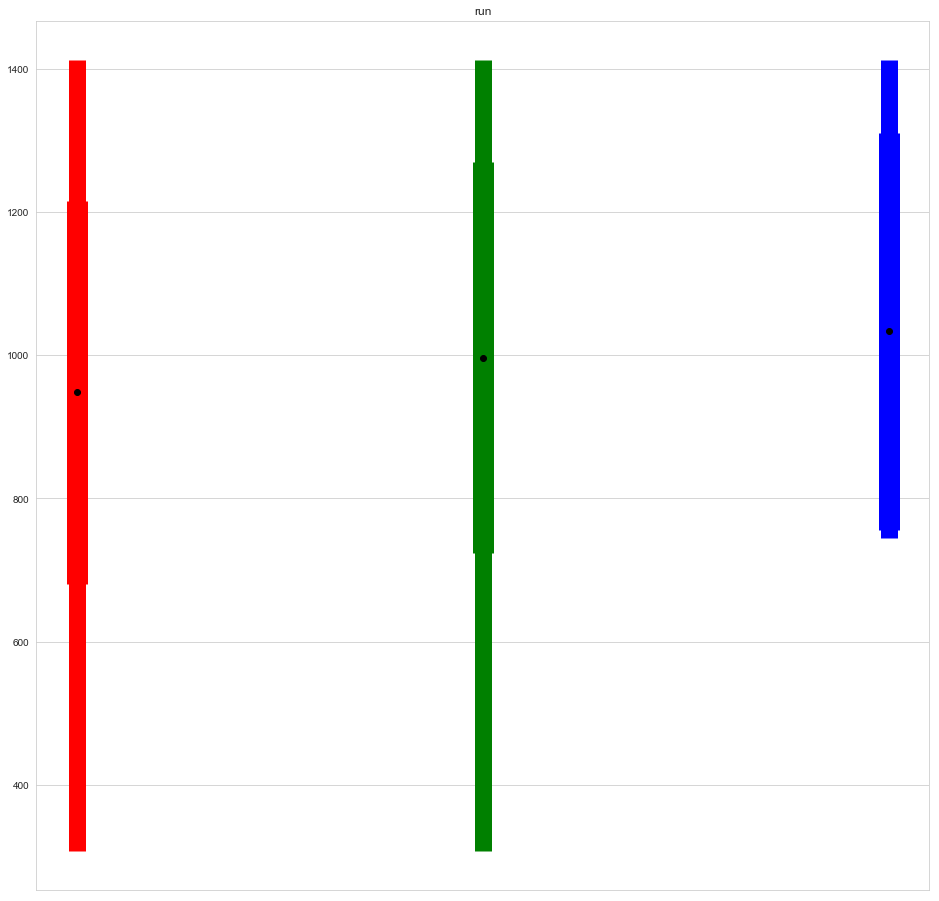

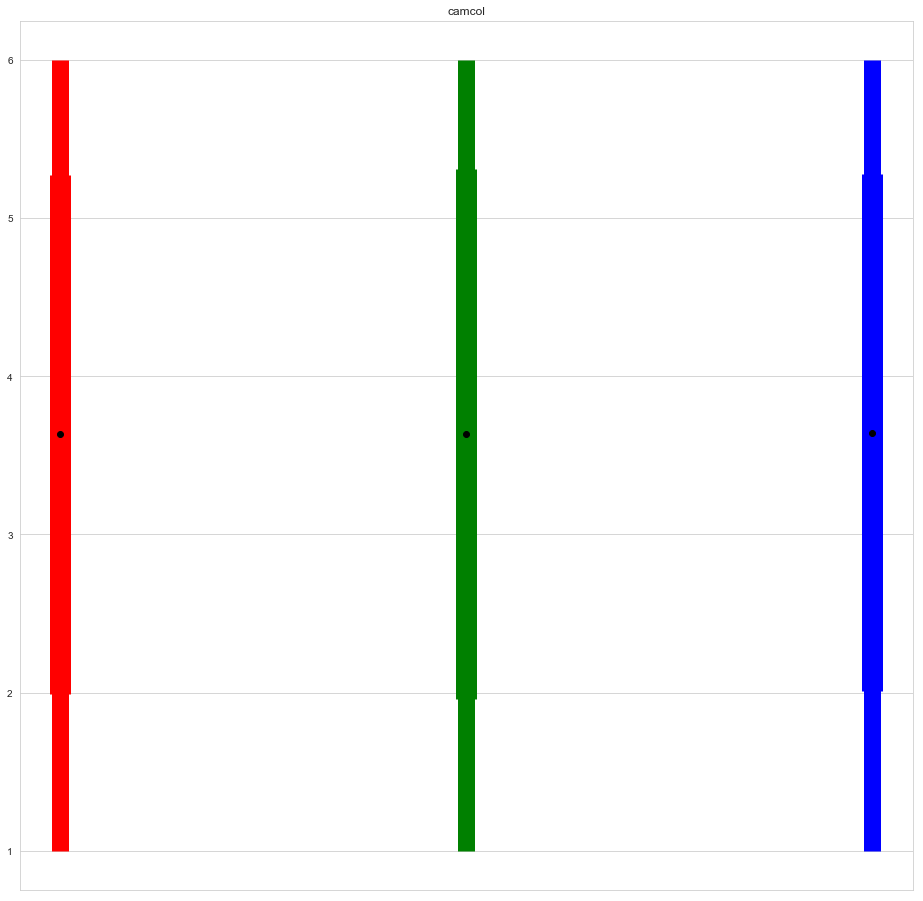

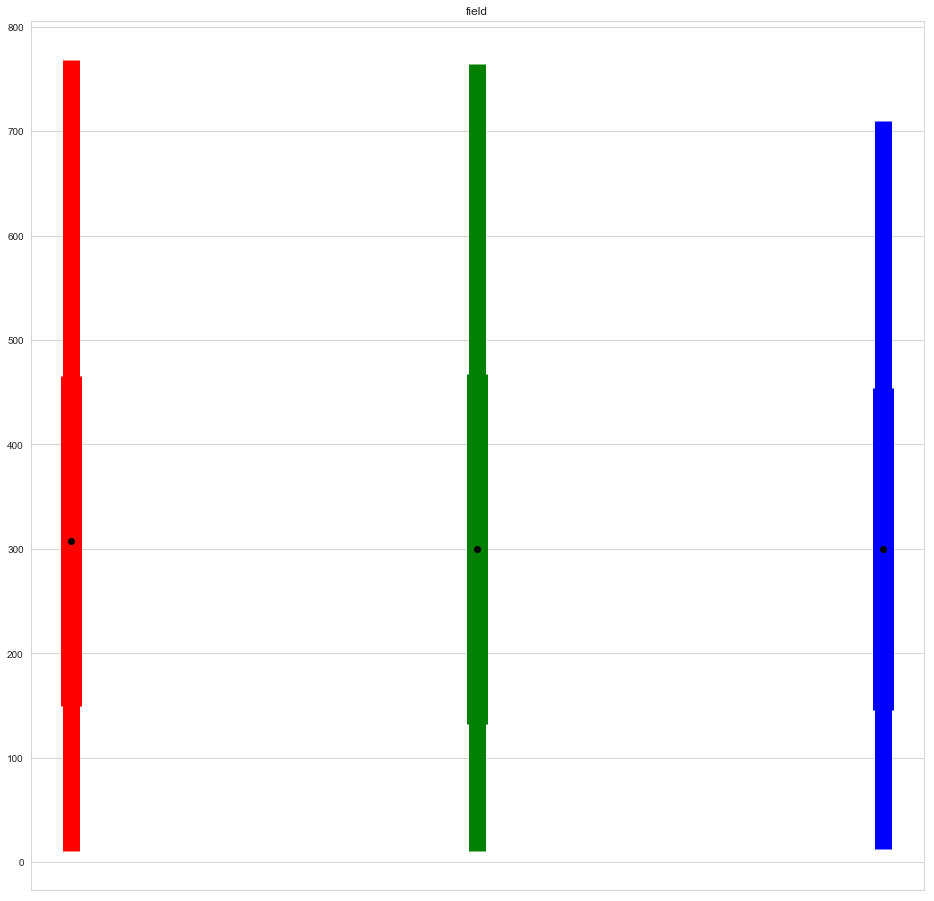

In [60]:
# fig=plt.figure(1,figsize=(16,16))

ugriznames_array=['ra', 'dec', 'run', 'camcol', 'field', 'redshift', 'plate', 'mjd', 'fiberid']

for i in range(5):
    fig = plt.figure(1, figsize=(16,16))
    ax = fig.add_subplot(1, 1, 1)
#     ax.set_ylim(-10,100)
    ax.xaxis.grid(False)
    # construct some data like what you have:
    u_errorbar= [data[data['class']=='STAR'][ugriznames_array[i]],
                 data[data['class']=='GALAXY'][ugriznames_array[i]],
                 data[data['class']=='QSO'][ugriznames_array[i]]]

    x=[0,1,2];

    mins = np.array([u_errorbar[0].min(0),u_errorbar[1].min(0),u_errorbar[2].min(0)])
    maxes = np.array([u_errorbar[0].max(0),u_errorbar[1].max(0),u_errorbar[2].max(0)])
    means = np.array([u_errorbar[0].mean(0),u_errorbar[1].mean(0),u_errorbar[2].mean(0)])
    std = np.array([u_errorbar[0].std(0),u_errorbar[1].std(0),u_errorbar[2].std(0)])

    # create stacked errorbars:
    plt.errorbar(np.arange(3), means, std, fmt='ok', linewidth=21, ecolor=array_color)
    plt.errorbar(np.arange(3), means, [means - mins, maxes - means],
                 fmt='.k', ecolor=array_color, lw=17)
    plt.tick_params( axis='x', which='both', bottom=False,top=False,labelbottom=False)

    plt.title(ugriznames_array[i])
    plt.savefig('SDSS minmaxmean {}.pdf'.format(ugriznames_array[i]))
    plt.show()

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [30]:
features = ['u','g','r', 'i', 'z'];

# Normalization of the features
# x = data.loc[:, features].values
x = data.drop('class', axis=1).values
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=2)

prinComp = pca.fit_transform(x)

ugriz_pca_Df = pd.DataFrame(data = prinComp, columns = ['ugriz_pca1','ugriz_pca2'])

#Se crea el conjunto final de datos
sdss_finaldata=pd.concat([ data[['ra']], data[['dec']], ugriz_pca_Df, data[['redshift']], data[['class']], data[['mjd']] ], axis = 1)
sdss_finaldata.head()


,ra,dec,ugriz_pca1,ugriz_pca2,redshift,class,mjd
0,199.753207,-0.510695,-2.520663,1.820485,-0.000079,STAR,54970
1,208.885042,0.190004,2.617529,3.143472,0.000006,STAR,55605
2,166.967111,0.226408,-1.335392,-1.280260,0.000130,STAR,51900
3,27.075930,13.166724,-2.364302,0.419033,-0.000643,STAR,53262
4,113.223523,36.428723,-0.769135,-0.711450,0.084617,GALAXY,51877


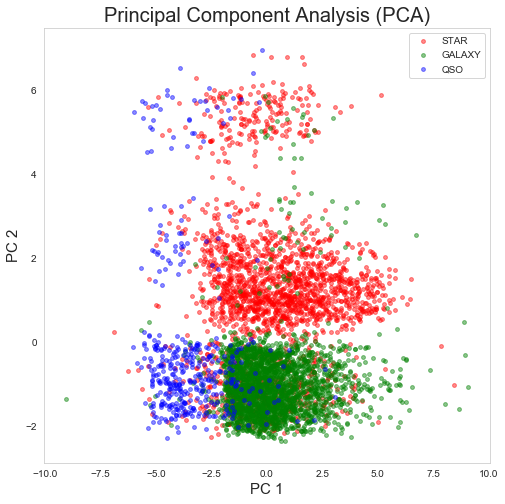

In [33]:
#The data is displayed according to the two main ugriz components

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC 1', fontsize = 15)
ax.set_ylabel('PC 2', fontsize = 15)
ax.set_title('Principal Component Analysis (PCA)', fontsize = 20)

clases = ['STAR', 'GALAXY', 'QSO']
colors = [star_color, galaxy_color, qso_color]
for clases, color in zip(clases,colors):
    indicesToKeep = sdss_finaldata['class'] == clases
    ax.scatter(ugriz_pca_Df.loc[indicesToKeep, 'ugriz_pca1'], ugriz_pca_Df.loc[indicesToKeep, 'ugriz_pca2']
               , c = color, s = 15,alpha=0.45)
ax.legend(['STAR', 'GALAXY', 'QSO'])
ax.grid()
plt.savefig('Principal Component Analysis (PCA) all.pdf')

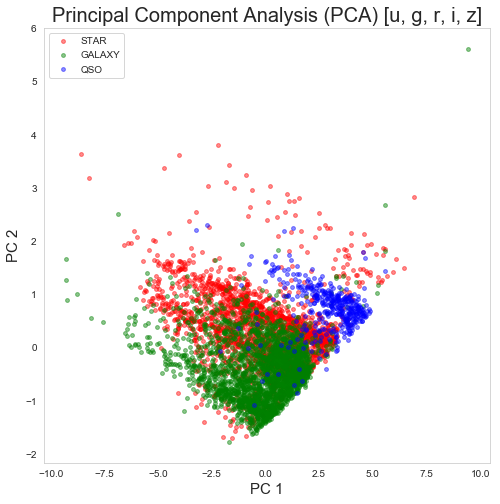

In [34]:
features = ['u','g','r', 'i', 'z'];

# Normalization of the features
x = data.loc[:, features].values
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=2)

prinComp = pca.fit_transform(x)

ugriz_pca_Df = pd.DataFrame(data = prinComp, columns = ['ugriz_pca1','ugriz_pca2'])

#Se crea el conjunto final de datos
sdss_finaldata=pd.concat([ data[['ra']], data[['dec']], ugriz_pca_Df, data[['redshift']], data[['class']], data[['mjd']] ], axis = 1)
#The data is displayed according to the two main ugriz components

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC 1', fontsize = 15)
ax.set_ylabel('PC 2', fontsize = 15)
ax.set_title('Principal Component Analysis (PCA) [u, g, r, i, z]', fontsize = 20)

clases = ['STAR', 'GALAXY', 'QSO']
colors = [star_color, galaxy_color, qso_color]
for clases, color in zip(clases,colors):
    indicesToKeep = sdss_finaldata['class'] == clases
    ax.scatter(ugriz_pca_Df.loc[indicesToKeep, 'ugriz_pca1'], ugriz_pca_Df.loc[indicesToKeep, 'ugriz_pca2']
               , c = color, s = 15,alpha=0.45)
ax.legend(['STAR', 'GALAXY', 'QSO'])
ax.grid()
plt.savefig('Principal Component Analysis (PCA) ugriz.pdf')

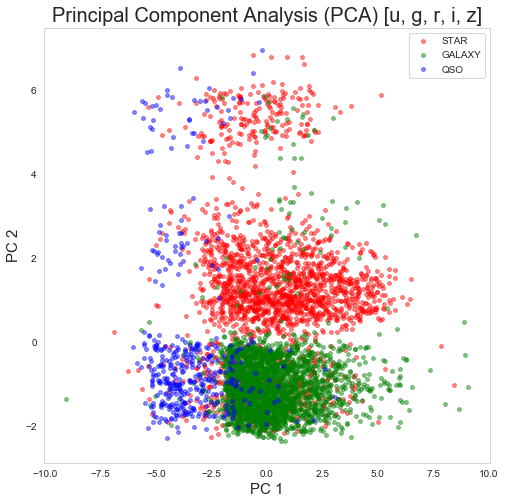

In [46]:

# features = ['u','g','r', 'i', 'z'];
features = ['u', 'g', 'r', 'i', 'z', 'objid', 'ra', 'dec', 'run', 'rerun', 'camcol', 'field', 'specobjid', 'redshift', 'plate', 'mjd', 'fiberid']

# Normalization of the features
x = data.loc[:, features].values
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=2)

prinComp = pca.fit_transform(x)

ugriz_pca_Df = pd.DataFrame(data = prinComp, columns = ['ugriz_pca1','ugriz_pca2'])

#Se crea el conjunto final de datos
sdss_finaldata=pd.concat([ data[['ra']], data[['dec']], ugriz_pca_Df, data[['redshift']], data[['class']], data[['mjd']] ], axis = 1)
#The data is displayed according to the two main ugriz components

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC 1', fontsize = 15)
ax.set_ylabel('PC 2', fontsize = 15)
ax.set_title('Principal Component Analysis (PCA) [u, g, r, i, z]', fontsize = 20)

clases = ['STAR', 'GALAXY', 'QSO']
colors = [star_color, galaxy_color, qso_color]
for clases, color in zip(clases,colors):
    indicesToKeep = sdss_finaldata['class'] == clases
    ax.scatter(ugriz_pca_Df.loc[indicesToKeep, 'ugriz_pca1'], ugriz_pca_Df.loc[indicesToKeep, 'ugriz_pca2']
               , c = color, s = 15,alpha=0.45)
ax.legend(['STAR', 'GALAXY', 'QSO'])
ax.grid()
plt.savefig('Principal Component Analysis (PCA) ugriz.pdf')